In [74]:
import pandas as pd
import numpy as np
import itertools

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout, SimpleRNN,LSTM, Activation
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

train = pd.read_csv('C:/Users/Yash/OneDrive/Desktop/emoji/train_emoji.csv',header=None)
test = pd.read_csv('C:/Users/Yash/OneDrive/Desktop/emoji/test_emoji.csv',header=None)

#### Perform Exploratory Data Analysis (EDA)

In [75]:
train.head()

,0,1,2,3
0,never talk to me again,3,NaN,NaN
1,I am proud of your achievements,2,NaN,NaN
2,It is the worst day in my life,3,NaN,NaN
3,Miss you so much,0,NaN,[0]
4,food is life,4,NaN,NaN


In [76]:
test.head()

,0,1
0,I want to eat\t,4
1,he did not answer\t,3
2,he got a raise\t,2
3,she got me a present\t,0
4,ha ha ha it was so funny\t,2


In [77]:
emoji_dict = { 0 : ":heart:", 1 : ":baseball:", 2 : ":smile:", 3 : ":disappointed:", 4 : ":fork_and_knife:"}

In [78]:
import emoji

for ix in emoji_dict.keys():
    print (ix,end=" ")
    print (emoji.emojize(emoji_dict[ix], use_aliases=True))

0 ❤️
1 ⚾
2 😄
3 😞
4 🍴


In [79]:
# Creating training and testing data
X_train = train[0]
Y_train = train[1]

X_test = test[0]
Y_test = test[1]

print (X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(132,) (132,) (56,) (56,)


In [80]:
for ix in range(X_train.shape[0]):
    X_train[ix] = X_train[ix].split()

for ix in range(X_test.shape[0]):
    X_test[ix] = X_test[ix].split()
    
Y_train = to_categorical(Y_train)

<ipython-input-80-f1bc63141b06>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[ix] = X_train[ix].split()
<ipython-input-80-f1bc63141b06>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[ix] = X_test[ix].split()


In [81]:
print (X_train[0],Y_train[0])

['never', 'talk', 'to', 'me', 'again'] [0. 0. 0. 1. 0.]


In [82]:
np.unique(np.array([len(ix) for ix in X_train]) , return_counts=True)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 4,  5, 26, 35, 20, 21, 11,  5,  1,  4], dtype=int64))

In [83]:
np.unique(np.array([len(ix) for ix in X_test]) , return_counts=True)

(array([2, 3, 4, 5, 6, 7, 8]),
 array([ 3, 12, 16, 17,  3,  4,  1], dtype=int64))

In [84]:
embeddings_index = {}

f = open('C:/Users/Yash/OneDrive/Desktop/emoji/glove.6B.50d.txt', encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

In [85]:
embeddings_index["i"].shape

(50,)

In [86]:
from scipy import spatial
# Checking cosine similarity of words happy and sad
spatial.distance.cosine(embeddings_index["happy"], embeddings_index["sad"])

0.31093674898147583

In [87]:
spatial.distance.cosine(embeddings_index["india"], embeddings_index["delhi"])

0.18572336435317993

In [88]:
spatial.distance.cosine(embeddings_index["france"], embeddings_index["paris"])

0.19746702909469604

In [89]:
embedding_matrix_train = np.zeros((X_train.shape[0], 10, 50))
embedding_matrix_test = np.zeros((X_test.shape[0], 10, 50))

for ix in range(X_train.shape[0]):
    for ij in range(len(X_train[ix])):
        embedding_matrix_train[ix][ij] = embeddings_index[X_train[ix][ij].lower()]
        
for ix in range(X_test.shape[0]):
    for ij in range(len(X_test[ix])):
        embedding_matrix_test[ix][ij] = embeddings_index[X_test[ix][ij].lower()]

In [90]:
print (embedding_matrix_train.shape, embedding_matrix_test.shape)

(132, 10, 50) (56, 10, 50)


#### Build the Text Classifier for Emoji Prediction

In [91]:
model = Sequential()
model.add(LSTM(128, input_shape=(10,50), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(5))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 10, 128)           91648     
                                                                 
 dropout_2 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                                 
 activation_1 (Activation)   (None, 5)                 0         
                                                                 
Total params: 223,877
Trainable params: 223,877
Non-tr

In [92]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#### TRAINING MODULE

In [93]:
hist = model.fit(embedding_matrix_train,
                 Y_train,
                 epochs = 50, 
                 batch_size=32,
                 shuffle=True
                )

Epoch 1/50
5/5 [==============================] - 3s 17ms/step - loss: 1.5775 - accuracy: 0.3258
Epoch 2/50
5/5 [==============================] - 0s 12ms/step - loss: 1.5119 - accuracy: 0.3333
Epoch 3/50
5/5 [==============================] - 0s 12ms/step - loss: 1.4551 - accuracy: 0.3864
Epoch 4/50
5/5 [==============================] - 0s 13ms/step - loss: 1.3752 - accuracy: 0.4697
Epoch 5/50
5/5 [==============================] - 0s 13ms/step - loss: 1.2358 - accuracy: 0.5379
Epoch 6/50
5/5 [==============================] - 0s 13ms/step - loss: 1.0789 - accuracy: 0.6439
Epoch 7/50
5/5 [==============================] - 0s 14ms/step - loss: 0.9694 - accuracy: 0.6818
Epoch 8/50
5/5 [==============================] - 0s 13ms/step - loss: 0.8248 - accuracy: 0.6894
Epoch 9/50
5/5 [==============================] - 0s 13ms/step - loss: 0.7420 - accuracy: 0.7121
Epoch 10/50
5/5 [==============================] - 0s 13ms/step - loss: 0.6640 - accuracy: 0.7576
Epoch 11/50
5/5 [============

In [94]:
y_pred = model.predict(embedding_matrix_test)
y_pred = np.round(y_pred).astype(int)
float(sum(y_pred==Y_test))/embedding_matrix_test.shape[0]

0.0

In [99]:
for ix in range(embedding_matrix_test.shape[0]):
    
    if (y_pred[ix] != Y_test[ix]).all():
        print(ix)
        print (test[0][ix],end=" ")
        print (emoji.emojize(emoji_dict[Y_test[ix]], use_aliases=True))

0
['I', 'want', 'to', 'eat'] 🍴
1
['he', 'did', 'not', 'answer'] 😞
2
['he', 'got', 'a', 'raise'] 😄
4
['ha', 'ha', 'ha', 'it', 'was', 'so', 'funny'] 😄
8
['where', 'is', 'the', 'food'] 🍴
9
['Stop', 'making', 'this', 'joke', 'ha', 'ha', 'ha'] 😄
11
['work', 'is', 'hard'] 😞
12
['This', 'girl', 'is', 'messing', 'with', 'me'] 😞
13
['are', 'you', 'serious', 'ha', 'ha'] 😄
15
['This', 'stupid', 'grader', 'is', 'not', 'working'] 😞
16
['work', 'is', 'horrible'] 😞
17
['Congratulation', 'for', 'having', 'a', 'baby'] 😄
18
['stop', 'messing', 'around'] 😞
19
['any', 'suggestions', 'for', 'dinner'] 🍴
21
['you', 'brighten', 'my', 'day'] 😄
22
['I', 'boiled', 'rice'] 🍴
23
['she', 'is', 'a', 'bully'] 😞
24
['Why', 'are', 'you', 'feeling', 'bad'] 😞
25
['I', 'am', 'upset'] 😞
26
['I', 'worked', 'during', 'my', 'birthday'] 😞
28
['enjoy', 'your', 'break'] 😄
32
['My', 'life', 'is', 'so', 'boring'] 😞
33
['she', 'said', 'yes'] 😄
36
['dance', 'with', 'me'] 😄
37
['I', 'am', 'starving'] 🍴
38
['See', 'you', 'at', 'the', 

#### Plot the loss and accuracies of our model on the dataset.

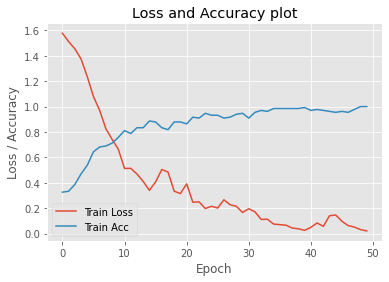

In [98]:
epochs = 50
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), hist.history["loss"], label = "Train Loss")
plt.plot(np.arange(0, epochs), hist.history["accuracy"], label = "Train Acc")
plt.title("Loss and Accuracy plot")
plt.xlabel("Epoch")
plt.ylabel("Loss / Accuracy")
plt.legend(loc = "lower left")
plt.savefig("plot.jpg")